### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


# Import libriaries : 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs

## Ids of Cities Tanger and Benguerir :

In [3]:
id_Tanger = "701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c"
id_Benguerir = "f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111"

## Forcasting Weather of Benguerir City :

In [4]:
#id_City = str(input("Enter the id of Benguerir City : "))
Forcast_Benguerir_request = requests.get("https://weather.com/fr-MA/temps/10jours/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111")

In [5]:
Forcast_content = bs(Forcast_Benguerir_request.content, 'lxml')
type(Forcast_content)

bs4.BeautifulSoup

In [6]:
Forcast_Benguerir = Forcast_content.find('div', id = "WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263")
Forcast_Benguerir_summaries = Forcast_Benguerir.find_all('summary')

### Function of get all information from summary :

In [7]:
def get_all_info(summary):
    df = [] 
    a = summary.find('h3')
    if  a != None:
        if a.get_text() not in df:
             df.append(a.get_text())
                
    for i in summary.find('div').find_all('div'):
        c = i.find_all('span')
        for span in c:
            df.append(span.get_text())
            
        break
    return df

### Get all information from summary  of Benguerir City:

In [8]:
df = [get_all_info(Forcast_Benguerir_summaries[b]) for b in range(1,15)]
df

[['dim. 18', '22°', '/8°', '8°', 'Ensoleillé', '14%', 'SE 10 km/h'],
 ['lun. 19', '23°', '/7°', '7°', 'Ensoleillé', '8%', 'E 11 km/h'],
 ['mar. 20', '23°', '/7°', '7°', 'Peu nuageux', '8%', 'SSO 11 km/h'],
 ['mer. 21', '21°', '/7°', '7°', 'Ensoleillé', '8%', 'ENE 13 km/h'],
 ['jeu. 22', '22°', '/6°', '6°', 'Ensoleillé', '10%', 'ENE 12 km/h'],
 ['ven. 23', '22°', '/6°', '6°', 'Ensoleillé', '8%', 'S 12 km/h'],
 ['sam. 24', '22°', '/6°', '6°', 'Ensoleillé', '7%', 'S 12 km/h'],
 ['dim. 25', '22°', '/7°', '7°', 'Ensoleillé', '14%', 'SE 13 km/h'],
 ['lun. 26', '22°', '/9°', '9°', 'Plutôt ensoleillé', '13%', 'SSE 18 km/h'],
 ['mar. 27', '20°', '/8°', '8°', 'Peu nuageux', '1%', 'S 16 km/h'],
 ['mer. 28', '20°', '/8°', '8°', 'Peu nuageux', '3%', 'S 16 km/h'],
 ['jeu. 29', '20°', '/8°', '8°', 'Peu nuageux', '2%', 'S 14 km/h'],
 ['ven. 30', '20°', '/8°', '8°', 'Peu nuageux', '9%', 'S 14 km/h'],
 ['sam. 31', '21°', '/9°', '9°', 'Peu nuageux', '2%', 'S 14 km/h']]

### Create a columns of Data :

In [9]:
columns = ['Day', 'Max_Temperature', 'Min_Temperature1', 
           'Min_Temperature', 'State', 'Percentage_Value', 'Wind_Speed']

### Create Data of forcasting weather of Benguerir City :

In [10]:
Benguerir_data = pd.DataFrame(data=df, columns = columns)

In [11]:
Benguerir_data

,Day,Max_Temperature,Min_Temperature1,Min_Temperature,State,Percentage_Value,Wind_Speed
0,dim. 18,22°,/8°,8°,Ensoleillé,14%,SE 10 km/h
1,lun. 19,23°,/7°,7°,Ensoleillé,8%,E 11 km/h
2,mar. 20,23°,/7°,7°,Peu nuageux,8%,SSO 11 km/h
3,mer. 21,21°,/7°,7°,Ensoleillé,8%,ENE 13 km/h
4,jeu. 22,22°,/6°,6°,Ensoleillé,10%,ENE 12 km/h
5,ven. 23,22°,/6°,6°,Ensoleillé,8%,S 12 km/h
6,sam. 24,22°,/6°,6°,Ensoleillé,7%,S 12 km/h
7,dim. 25,22°,/7°,7°,Ensoleillé,14%,SE 13 km/h
8,lun. 26,22°,/9°,9°,Plutôt ensoleillé,13%,SSE 18 km/h
9,mar. 27,20°,/8°,8°,Peu nuageux,1%,S 16 km/h


### Deletion of the repeated column : 

In [12]:
del(Benguerir_data["Min_Temperature1"])

### Printing the Benguerir data of forcasting weather :

In [13]:
Benguerir_data

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Wind_Speed
0,dim. 18,22°,8°,Ensoleillé,14%,SE 10 km/h
1,lun. 19,23°,7°,Ensoleillé,8%,E 11 km/h
2,mar. 20,23°,7°,Peu nuageux,8%,SSO 11 km/h
3,mer. 21,21°,7°,Ensoleillé,8%,ENE 13 km/h
4,jeu. 22,22°,6°,Ensoleillé,10%,ENE 12 km/h
5,ven. 23,22°,6°,Ensoleillé,8%,S 12 km/h
6,sam. 24,22°,6°,Ensoleillé,7%,S 12 km/h
7,dim. 25,22°,7°,Ensoleillé,14%,SE 13 km/h
8,lun. 26,22°,9°,Plutôt ensoleillé,13%,SSE 18 km/h
9,mar. 27,20°,8°,Peu nuageux,1%,S 16 km/h


## Forcasting Weather of Tanger City :

In [14]:
#id_City = str(input("Enter the id of Tanger City : "))
Forcast_Tanger_request = requests.get("https://weather.com/fr-MA/temps/10jours/l/701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c")

In [15]:
Forcast_content = bs(Forcast_Tanger_request.content, 'lxml')
type(Forcast_content)

bs4.BeautifulSoup

In [16]:
Forcast_Tanger = Forcast_content.find('div', id = "WxuDailyCard-main-a43097e1-49d7-4df7-9d1a-334b29628263")
Forcast_Tanger_summaries = Forcast_Tanger.find_all('summary')

### Get all information from summary  of Tanger City:

In [17]:
df_1 = [get_all_info(Forcast_Tanger_summaries[b]) for b in range(1,15)]
df_1

[['dim. 18', '20°', '/15°', '15°', 'Peu nuageux', '14%', 'E 23 km/h'],
 ['lun. 19', '21°', '/13°', '13°', 'Plutôt ensoleillé', '14%', 'E 16 km/h'],
 ['mar. 20',
  '22°',
  '/15°',
  '15°',
  "Averses dans l'après-midi",
  '45%',
  'SE 16 km/h'],
 ['mer. 21', '20°', '/13°', '13°', 'Peu nuageux', '22%', 'SO 11 km/h'],
 ['jeu. 22', '19°', '/12°', '12°', 'Peu nuageux', '12%', 'NNO 8 km/h'],
 ['ven. 23', '19°', '/13°', '13°', 'Peu nuageux', '12%', 'SO 8 km/h'],
 ['sam. 24',
  '19°',
  '/13°',
  '13°',
  "Averses dans l'après-midi",
  '40%',
  'SO 9 km/h'],
 ['dim. 25', '19°', '/14°', '14°', 'Averses', '52%', 'ESE 13 km/h'],
 ['lun. 26',
  '19°',
  '/14°',
  '14°',
  'Averses dans la matinée',
  '32%',
  'E 19 km/h'],
 ['mar. 27',
  '18°',
  '/14°',
  '14°',
  "Averses dans l'après-midi",
  '30%',
  'SE 19 km/h'],
 ['mer. 28', '18°', '/14°', '14°', 'Averses', '40%', 'ESE 19 km/h'],
 ['jeu. 29', '18°', '/14°', '14°', 'Averses', '40%', 'SE 18 km/h'],
 ['ven. 30', '18°', '/14°', '14°', 'Averses

### Create Data of forcasting weather of Tanger City :

In [18]:
Tanger_data = pd.DataFrame(data=df_1, columns = columns)

In [19]:
Tanger_data

,Day,Max_Temperature,Min_Temperature1,Min_Temperature,State,Percentage_Value,Wind_Speed
0,dim. 18,20°,/15°,15°,Peu nuageux,14%,E 23 km/h
1,lun. 19,21°,/13°,13°,Plutôt ensoleillé,14%,E 16 km/h
2,mar. 20,22°,/15°,15°,Averses dans l'après-midi,45%,SE 16 km/h
3,mer. 21,20°,/13°,13°,Peu nuageux,22%,SO 11 km/h
4,jeu. 22,19°,/12°,12°,Peu nuageux,12%,NNO 8 km/h
5,ven. 23,19°,/13°,13°,Peu nuageux,12%,SO 8 km/h
6,sam. 24,19°,/13°,13°,Averses dans l'après-midi,40%,SO 9 km/h
7,dim. 25,19°,/14°,14°,Averses,52%,ESE 13 km/h
8,lun. 26,19°,/14°,14°,Averses dans la matinée,32%,E 19 km/h
9,mar. 27,18°,/14°,14°,Averses dans l'après-midi,30%,SE 19 km/h


### Deletion of the repeated column : 

In [20]:
del(Tanger_data["Min_Temperature1"])

### Printing the Tanger data of forcasting weather :

In [21]:
Tanger_data

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Wind_Speed
0,dim. 18,20°,15°,Peu nuageux,14%,E 23 km/h
1,lun. 19,21°,13°,Plutôt ensoleillé,14%,E 16 km/h
2,mar. 20,22°,15°,Averses dans l'après-midi,45%,SE 16 km/h
3,mer. 21,20°,13°,Peu nuageux,22%,SO 11 km/h
4,jeu. 22,19°,12°,Peu nuageux,12%,NNO 8 km/h
5,ven. 23,19°,13°,Peu nuageux,12%,SO 8 km/h
6,sam. 24,19°,13°,Averses dans l'après-midi,40%,SO 9 km/h
7,dim. 25,19°,14°,Averses,52%,ESE 13 km/h
8,lun. 26,19°,14°,Averses dans la matinée,32%,E 19 km/h
9,mar. 27,18°,14°,Averses dans l'après-midi,30%,SE 19 km/h


### Create a new data of raining days in Tanger City : 

In [22]:
L = []
for i in range(len(Tanger_data["Percentage_Value"])):
    L.append(Tanger_data["Percentage_Value"][i])


In [23]:
new_L = []
for i in L:
    new_L.append(i.replace('%', ''))

In [24]:
T = []
for i in range(len(new_L)):
    T.append(int(new_L[i]))

In [25]:
Tanger_data.insert(loc = 5,
          column='Int_Percentage_Value',
          value = T)

In [26]:
Tanger_data

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Int_Percentage_Value,Wind_Speed
0,dim. 18,20°,15°,Peu nuageux,14%,14,E 23 km/h
1,lun. 19,21°,13°,Plutôt ensoleillé,14%,14,E 16 km/h
2,mar. 20,22°,15°,Averses dans l'après-midi,45%,45,SE 16 km/h
3,mer. 21,20°,13°,Peu nuageux,22%,22,SO 11 km/h
4,jeu. 22,19°,12°,Peu nuageux,12%,12,NNO 8 km/h
5,ven. 23,19°,13°,Peu nuageux,12%,12,SO 8 km/h
6,sam. 24,19°,13°,Averses dans l'après-midi,40%,40,SO 9 km/h
7,dim. 25,19°,14°,Averses,52%,52,ESE 13 km/h
8,lun. 26,19°,14°,Averses dans la matinée,32%,32,E 19 km/h
9,mar. 27,18°,14°,Averses dans l'après-midi,30%,30,SE 19 km/h


In [27]:
Tanger_data_possibilty_raining = Tanger_data.loc[Tanger_data["Int_Percentage_Value"] >= 10]

In [28]:
Tanger_data_possibilty_raining

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Int_Percentage_Value,Wind_Speed
0,dim. 18,20°,15°,Peu nuageux,14%,14,E 23 km/h
1,lun. 19,21°,13°,Plutôt ensoleillé,14%,14,E 16 km/h
2,mar. 20,22°,15°,Averses dans l'après-midi,45%,45,SE 16 km/h
3,mer. 21,20°,13°,Peu nuageux,22%,22,SO 11 km/h
4,jeu. 22,19°,12°,Peu nuageux,12%,12,NNO 8 km/h
5,ven. 23,19°,13°,Peu nuageux,12%,12,SO 8 km/h
6,sam. 24,19°,13°,Averses dans l'après-midi,40%,40,SO 9 km/h
7,dim. 25,19°,14°,Averses,52%,52,ESE 13 km/h
8,lun. 26,19°,14°,Averses dans la matinée,32%,32,E 19 km/h
9,mar. 27,18°,14°,Averses dans l'après-midi,30%,30,SE 19 km/h


### Create a new data of raining days in Benguerir City : 

In [29]:
L1 = []
for i in range(len(Benguerir_data["Percentage_Value"])):
    L1.append(Benguerir_data["Percentage_Value"][i])

In [30]:
new_L1 = []
for i in L1:
    new_L1.append(i.replace('%', ''))

In [31]:
B = []
for i in range(len(new_L1)):
    B.append(int(new_L1[i]))

In [32]:
Benguerir_data.insert(loc = 5,
          column='Int_Percentage_Value',
          value = B)

In [33]:
Benguerir_data

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Int_Percentage_Value,Wind_Speed
0,dim. 18,22°,8°,Ensoleillé,14%,14,SE 10 km/h
1,lun. 19,23°,7°,Ensoleillé,8%,8,E 11 km/h
2,mar. 20,23°,7°,Peu nuageux,8%,8,SSO 11 km/h
3,mer. 21,21°,7°,Ensoleillé,8%,8,ENE 13 km/h
4,jeu. 22,22°,6°,Ensoleillé,10%,10,ENE 12 km/h
5,ven. 23,22°,6°,Ensoleillé,8%,8,S 12 km/h
6,sam. 24,22°,6°,Ensoleillé,7%,7,S 12 km/h
7,dim. 25,22°,7°,Ensoleillé,14%,14,SE 13 km/h
8,lun. 26,22°,9°,Plutôt ensoleillé,13%,13,SSE 18 km/h
9,mar. 27,20°,8°,Peu nuageux,1%,1,S 16 km/h


In [34]:
Benguerir_data_possibilty_raining = Benguerir_data.loc[Benguerir_data["Int_Percentage_Value"] >= 10]

In [35]:
Benguerir_data_possibilty_raining

,Day,Max_Temperature,Min_Temperature,State,Percentage_Value,Int_Percentage_Value,Wind_Speed
0,dim. 18,22°,8°,Ensoleillé,14%,14,SE 10 km/h
4,jeu. 22,22°,6°,Ensoleillé,10%,10,ENE 12 km/h
7,dim. 25,22°,7°,Ensoleillé,14%,14,SE 13 km/h
8,lun. 26,22°,9°,Plutôt ensoleillé,13%,13,SSE 18 km/h


### Concatenation of Tanger Data City and Benguerir Data City : 

In [36]:
list_of_data = [Benguerir_data, Tanger_data]
result = pd.concat(list_of_data, keys = ["Benguerir", "Tanger"])
result

Day Max_Temperature Min_Temperature  \
Benguerir 0   dim. 18             22°              8°   
          1   lun. 19             23°              7°   
          2   mar. 20             23°              7°   
          3   mer. 21             21°              7°   
          4   jeu. 22             22°              6°   
          5   ven. 23             22°              6°   
          6   sam. 24             22°              6°   
          7   dim. 25             22°              7°   
          8   lun. 26             22°              9°   
          9   mar. 27             20°              8°   
          10  mer. 28             20°              8°   
          11  jeu. 29             20°              8°   
          12  ven. 30             20°              8°   
          13  sam. 31             21°              9°   
Tanger    0   dim. 18             20°             15°   
          1   lun. 19             21°             13°   
          2   mar. 20             22°             15°   
          3   mer. 21             20°             13°   
          4   jeu. 22             19°             12°   
          5   ven. 23             19°             13°   
          6   sam. 24             19°             13°   
          7   dim. 25             19°             14°   
          8   lun. 26             19°             14°   
          9   mar. 27             18°             14°   
          10  mer. 28             18°             14°   
          11  jeu. 29             18°             14°   
          12  ven. 30             18°             14°   
          13  sam. 31             18°             14°   

                                  State Percentage_Value  \
Benguerir 0                  Ensoleillé              14%   
          1                  Ensoleillé               8%   
          2                 Peu nuageux               8%   
          3                  Ensoleillé               8%   
          4                  Ensoleillé              10%   
          5                  Ensoleillé               8%   
          6                  Ensoleillé               7%   
          7                  Ensoleillé              14%   
          8           Plutôt ensoleillé              13%   
          9                 Peu nuageux               1%   
          10                Peu nuageux               3%   
          11                Peu nuageux               2%   
          12                Peu nuageux               9%   
          13                Peu nuageux               2%   
Tanger    0                 Peu nuageux              14%   
          1           Plutôt ensoleillé              14%   
          2   Averses dans l'après-midi              45%   
          3                 Peu nuageux              22%   
          4                 Peu nuageux              12%   
          5                 Peu nuageux              12%   
          6   Averses dans l'après-midi              40%   
          7                     Averses              52%   
          8     Averses dans la matinée              32%   
          9   Averses dans l'après-midi              30%   
          10                    Averses              40%   
          11                    Averses              40%   
          12                    Averses              47%   
          13    Averses dans la matinée              36%   

              Int_Percentage_Value   Wind_Speed  
Benguerir 0                     14   SE 10 km/h  
          1                      8    E 11 km/h  
          2                      8  SSO 11 km/h  
          3                      8  ENE 13 km/h  
          4                     10  ENE 12 km/h  
          5                      8    S 12 km/h  
          6                      7    S 12 km/h  
          7                     14   SE 13 km/h  
          8                     13  SSE 18 km/h  
          9                      1    S 16 km/h  
          10                     3    S 16 km/h  
          11           

### Plotting the raining days in Tanger City And Benguerir City : 

In [37]:
import warnings
warnings.filterwarnings("ignore")

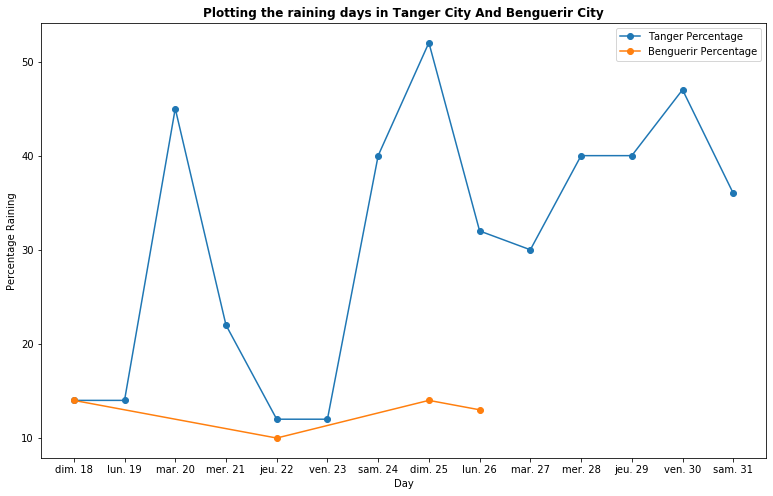

In [39]:
plt.figure(figsize = (13,8))
Day_1 = Tanger_data_possibilty_raining['Day']
Day_2 = Benguerir_data_possibilty_raining['Day']

plt.plot(Day_1,Tanger_data_possibilty_raining["Int_Percentage_Value"],marker = 'o', label = "Tanger Percentage")
plt.plot(Day_2,Benguerir_data_possibilty_raining["Int_Percentage_Value"],marker = 'o', label = "Benguerir Percentage")
plt.legend()
plt.locator_params('x',nbins = 20)
plt.title("Plotting the raining days in Tanger City And Benguerir City", fontweight='bold')
plt.xlabel('Day')
plt.ylabel('Percentage Raining')
plt.show()